【課程名稱】<font color=#FF0000>機器學習(Machine Learning, ML)</font><br>
【授課講師】[陳祥輝 (mail : HsiangHui.Chen@gmail.com)](mailto:HsiangHui.Chen@gmail.com)<br>
【facebook】[陳祥輝老師的臉書 (歡迎加好友)](https://goo.gl/osivhx)<br>
【相關課程】[東吳推廣數位資訊學苑陳祥輝老師的課程表](https://www.ext.scu.edu.tw/courses_search.php?key=陳祥輝)<br>

【資料集】
* [honordata.csv](https://raw.githubusercontent.com/OmaymaS/Logistic-Regression-Coefficients-Interpretation/master/honordata.csv)

<font color=#0000FF>安裝主要的模組</font>

In [1]:
# -*- coding: utf-8 -*-
from platform import python_version
import os, time, glob, socket
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from collections import Counter
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler

print("【日期時間】{}".format(time.strftime("%Y/%m/%d %H:%M:%S")))
print("【工作目錄】{}".format(os.getcwd()))
print("【主機名稱】{} ({})".format(socket.gethostname(),socket.gethostbyname(socket.gethostname())))
print("【Python】{}".format(python_version()))
print("【sklearn】{}".format(sklearn.__version__))

# %autosave 120

【日期時間】2025/03/21 20:17:32
【工作目錄】C:\Users\NTPU\Downloads
【主機名稱】502-11 (10.100.52.11)
【Python】3.12.4
【sklearn】1.4.2


In [2]:
from matplotlib.font_manager import FontProperties  
winfont01 = FontProperties(fname=r"c:\windows\fonts\simsun.ttc", size=12) 
winfont02 = FontProperties(fname=r"c:\windows\fonts\kaiu.ttf", size=12) 

# plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei']  # 設定字型為微軟正黑體
# plt.rcParams['axes.unicode_minus'] = False                # 解決負號顯示問題

# macfont = FontProperties(fname="/Library/Fonts/Arial Unicode.ttf", size=10) 

## Probability, Odds and Log of Odds
Let's say that the probability of success is $p=0.8$, then the probability of failure is $1-p=0.2$. The <font color=#FF0000>odds</font> of success is $\frac{p}{1-p}=\frac{0.8}{1-0.8}=4$, i.e. the odds of success is 4 to 1 and the odds of failure is 0.25 to 1.

Note that:

- **Probability** ranges from 0 to 1
- **Odds** range from 0 to $\infty$
- **Log Odds** range from $-\infty$ to $\infty$

That is why the log odds are used to avoid modeling a variable with a restricted range such as probability.

## Logistic Regression
Logistic regression models the the logit-transformed probability as a linear relationship with the predictor variables as follows:

$logit(p)= log(\frac{p}{1-p})=\beta_{0}+\beta_{1} x_{1}+...+\beta_{n} x_{n}$

or in terms of probabilities:

(1) $logit(p)= log(\frac{p}{1-p})=\beta_{0}+\beta_{1} x_{1}+...+\beta_{n} x_{n}$

(2) $(\frac{p}{1-p})=exp({\beta_{0}+\beta_{1} x_{1}+...+\beta_{n} x_{n}}) = e^{\beta_{0}+\beta_{1} x_{1}+...+\beta_{n} x_{n}}$

(3) $p=\frac{exp(\beta_{0}+\beta_{1} x_{1}+...+\beta_{n} x_{n})}{1+exp(\beta_{0}+\beta_{1} x_{1}+...+\beta_{n} x_{n})}$
 $=\frac{e^{(\beta_{0}+\beta_{1} x_{1}+...+\beta_{n} x_{n})}}{1+e^{(\beta_{0}+\beta_{1} x_{1}+...+\beta_{n} x_{n})}}$
 $=\frac{1}{1+e^{-(\beta_{0}+\beta_{1} x_{1}+...+\beta_{n} x_{n})}}$

### <font color=blue>探討 sigmoid 函數</font>

- $f(x)=\frac{1}{1+e^{-(\alpha+\beta x)}}$

In [4]:
def sigmoid(x, a=0, b=1) :
    return 1/(1+np.exp(-(a+b*x)))

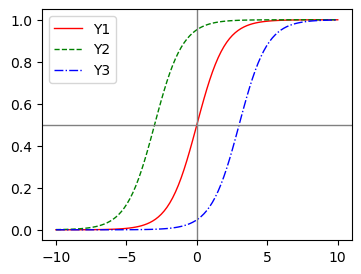

In [5]:
X = np.linspace(-10, 10, 100)
Y1 = sigmoid(X, a=0, b= 1)
Y2 = sigmoid(X, a=3, b= 1)
Y3 = sigmoid(X, a=-3, b= 1)

plt.figure(figsize=[4, 3])

plt.plot(X, Y1, linestyle='-', linewidth=1, color="red", label="Y1")
plt.plot(X, Y2, linestyle='--', linewidth=1, color="green", label="Y2")
plt.plot(X, Y3, linestyle='-.', linewidth=1, color="blue", label="Y3")
plt.legend()
plt.axhline(y=0.5, xmin=0, xmax=1, linestyle="-", linewidth=1, color="gray")
plt.axvline(x=0,   ymin=0, ymax=1, linestyle="-", linewidth=1, color="gray")

plt.show()

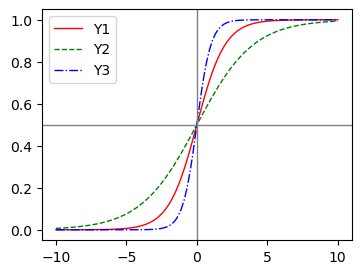

In [6]:
X = np.linspace(-10, 10, 100)
Y1 = sigmoid(X, a=0, b= 1)
Y2 = sigmoid(X, a=0, b= 0.5)
Y3 = sigmoid(X, a=0, b= 2)

plt.figure(figsize=[4, 3])

plt.plot(X, Y1, linestyle='-', linewidth=1, color="red", label="Y1")
plt.plot(X, Y2, linestyle='--', linewidth=1, color="green", label="Y2")
plt.plot(X, Y3, linestyle='-.', linewidth=1, color="blue", label="Y3")
plt.legend()
plt.axhline(y=0.5, xmin=0, xmax=1, linestyle="-", linewidth=1, color="gray")
plt.axvline(x=0,   ymin=0, ymax=1, linestyle="-", linewidth=1, color="gray")

plt.show()

### <font color=blue>LogisticRegression</font>

In [7]:
from sklearn.linear_model import LogisticRegression

#### <font color='blue'>電信客戶流失</font>

In [17]:
data = pd.read_csv(r"C:\Data\PyMLData\telecom_churn.csv")
data = data.select_dtypes(include=['number','bool'])
data.head()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,128,415,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,107,415,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,137,415,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,84,408,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,75,415,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [18]:
X = data.drop(["account length", "area code", "churn"], axis=1, inplace=False).to_numpy()
y = data["churn"].astype(int)

print(X.shape)
print(y.shape)
print(Counter(y))      # 不平衡，建議可以進行 平衡 的特徵工程 (以後再說)

(3333, 14)
(3333,)
Counter({0: 2850, 1: 483})


老師說她第一個步驟就是想看一下他有沒有平衡 在決定接下來要做的事

In [19]:
scaler = MinMaxScaler()
X_std = scaler.fit_transform(X)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X_std, y, 
                                                    test_size=0.2, 
                                                    random_state=42)

In [15]:
os.cpu_count()

12

In [25]:
model = LogisticRegression(penalty='l2',           # 懲罰項
                           tol=0.0001,             # tolerence 容忍門檻值
                           max_iter=100,           # 迭代次數(跑幾次)
                           C=1.0,                  # 就是懲罰項前面的 lambda 係數
                           random_state=None,      # seed
                           solver='lbfgs',         # 最佳化器，如何去找出來? 等下再說
                           multi_class='auto',     #  "ovr"(one-vs-rest) 表示二分類，"multinomial" 表示多分類
                           verbose=0,              # 顯示訊息量的多寡 0就是沒有
                           warm_start=False,       # 前面的記憶
                           n_jobs=-1,)           # cores 電腦 cpu 的核心數
# 如果沒辦法收斂可能是因為容忍直無法達標
# 這時候就要調整跌代次數

In [20]:
model.fit(X_train, y_train)
print(f"train acc : {model.score(X_train, y_train):.2%}")
print(f"test acc : {model.score(X_test, y_test):.2%}")

train acc : 85.97%
test acc : 85.16%


#### <font color='red'>如何判斷要使用哪一個 solver ?</font>

In [22]:
solvers = ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
models = [LogisticRegression(solver=solver).fit(X_train, y_train) for solver in solvers]
scores = [model.score(X_train, y_train) for model in models]  # 這裡如果沒有改每一次都會一樣
print(scores)
print(f"最大值的index : {np.argmax(scores)}")
print(f"最大值的solver : {solvers[np.argmax(scores)]}")

[0.859714928732183, 0.8589647411852963, 0.8600900225056264, 0.859714928732183, 0.859714928732183, 0.859714928732183]
最大值的index : 2
最大值的solver : newton-cg


#### <font color='blue'>香菇的分類(有毒性p、可食用e)</font>
- [Logistic Regression for Classifying Mushrooms](https://www.kaggle.com/sowbal/logistic-regression-for-classifying-mushrooms) <font color=#FF0000>【★★★★★】</font>

In [ ]:
fname = 'C:/Data/PyMLData/mushrooms.csv'
data = pd.read_csv(fname)
data.head(3)

### <font color=#0000FF>【wdbc威斯康辛乳腺癌診斷資料】</font>
威斯康辛乳腺癌診斷資料 : <https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data>

1. ID number
2. Diagnosis (M = malignant, B = benign) : （M =惡性，B =良性）

3-32 , Ten real-valued features are computed for each cell nucleus:
3. radius (mean of distances from center to points on the perimeter) : 半徑（從中心到外圍點的距離的平均值）
4. texture (standard deviation of gray-scale values) : 紋理（灰度值的標準偏差）
5. perimeter : 周長
6. area : 面積
7. smoothness (local variation in radius lengths) : 平滑度（半徑長度的局部變化）
8. compactness (perimeter^2 / area - 1.0) : 密實度（周長^ 2 /面積-1.0）
9. concavity (severity of concave portions of the contour) : 凹度（輪廓凹部的嚴重程度）
10. concave points (number of concave portions of the contour) : 凹點（輪廓的凹入部分的數量）
11. symmetry : 對稱
12. fractal dimension ("coastline approximation" - 1) : 分形維數（“海岸線近似”-1）



In [ ]:
uri = 'https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data'
colnames = ["id", "diagnosis", "radius_mean", "texture_mean", "perimeter_mean", 
           "area_mean", "smoothness_mean", "compactness_mean", "concavity_mean", "concave_points_mean",
           "symmetry_mean", "fractal_dimension_mean", "radius_se", "texture_se", "perimeter_se",
           "area_se", "smoothness_se", "compactness_se", "concavity_se", "concave points_se",
           "symmetry_se", "fractal_dimension_se", "radius_worst", "texture_worst", "perimeter_worst",
           "area_worst", "smoothness_worst", "compactness_worst", "concavity_worst", "concave_points_worst",
           "symmetry_worst", "fractal_dimension_worst"]
data = pd.read_csv(uri, header=None,names=colnames)
print(data.shape)
print(data.columns)

### <font color=#FF0000>Multinomial Logistic Regression</font>
- [Multinomial Logistic Regression With Python](https://machinelearningmastery.com/multinomial-logistic-regression-with-python/?fbclid=IwAR0zip9tm11LtsigbwtmePHMjRtwS7v4tHjr8ZIvNpgATnuX6M9xpHpxROc) <font color=#FF0000>【★★★★★】</font>
    - Binomial Logistic Regression: Standard logistic regression that predicts a binomial probability (i.e. for two classes) for each input example.
    - Multinomial Logistic Regression: Modified version of logistic regression that predicts a multinomial probability (i.e. more than two classes) for each input example.

#### <font color='red'>以下這個資料集有三種類別可以使用於此</font>
- [sklearn.datasets.load_wine](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html) : 三個類別

In [ ]:
dataset = sklearn.datasets.load_wine()
X = dataset.data
y = dataset.target
print(X.shape, y.shape)
print(Counter(y))
print(dataset.feature_names)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
# define the multinomial logistic regression model
model = LogisticRegression(multi_class='multinomial', solver='lbfgs')